## Preliminaries

In [366]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wavread
from scipy.io.wavfile import write as wavwrite

%matplotlib notebook

## File operations

Read the helloword WAV file.

Convert the stereo file to mono.

In [367]:
[samplerate, x] = wavread("/Users/serenafaruque/Dropbox/helloworld.wav")
x=x[:,0]

x

array([ -10591,  -30751,  -69097, ..., -383306, -555495, -769417], dtype=int32)

View sample rate of file. The sampling rate is how many data points were recorded every second.

In [368]:
samplerate

44100

View length of file. This is how many data points we have.

In [369]:
len(x)

93120

<IPython.core.display.Javascript object>


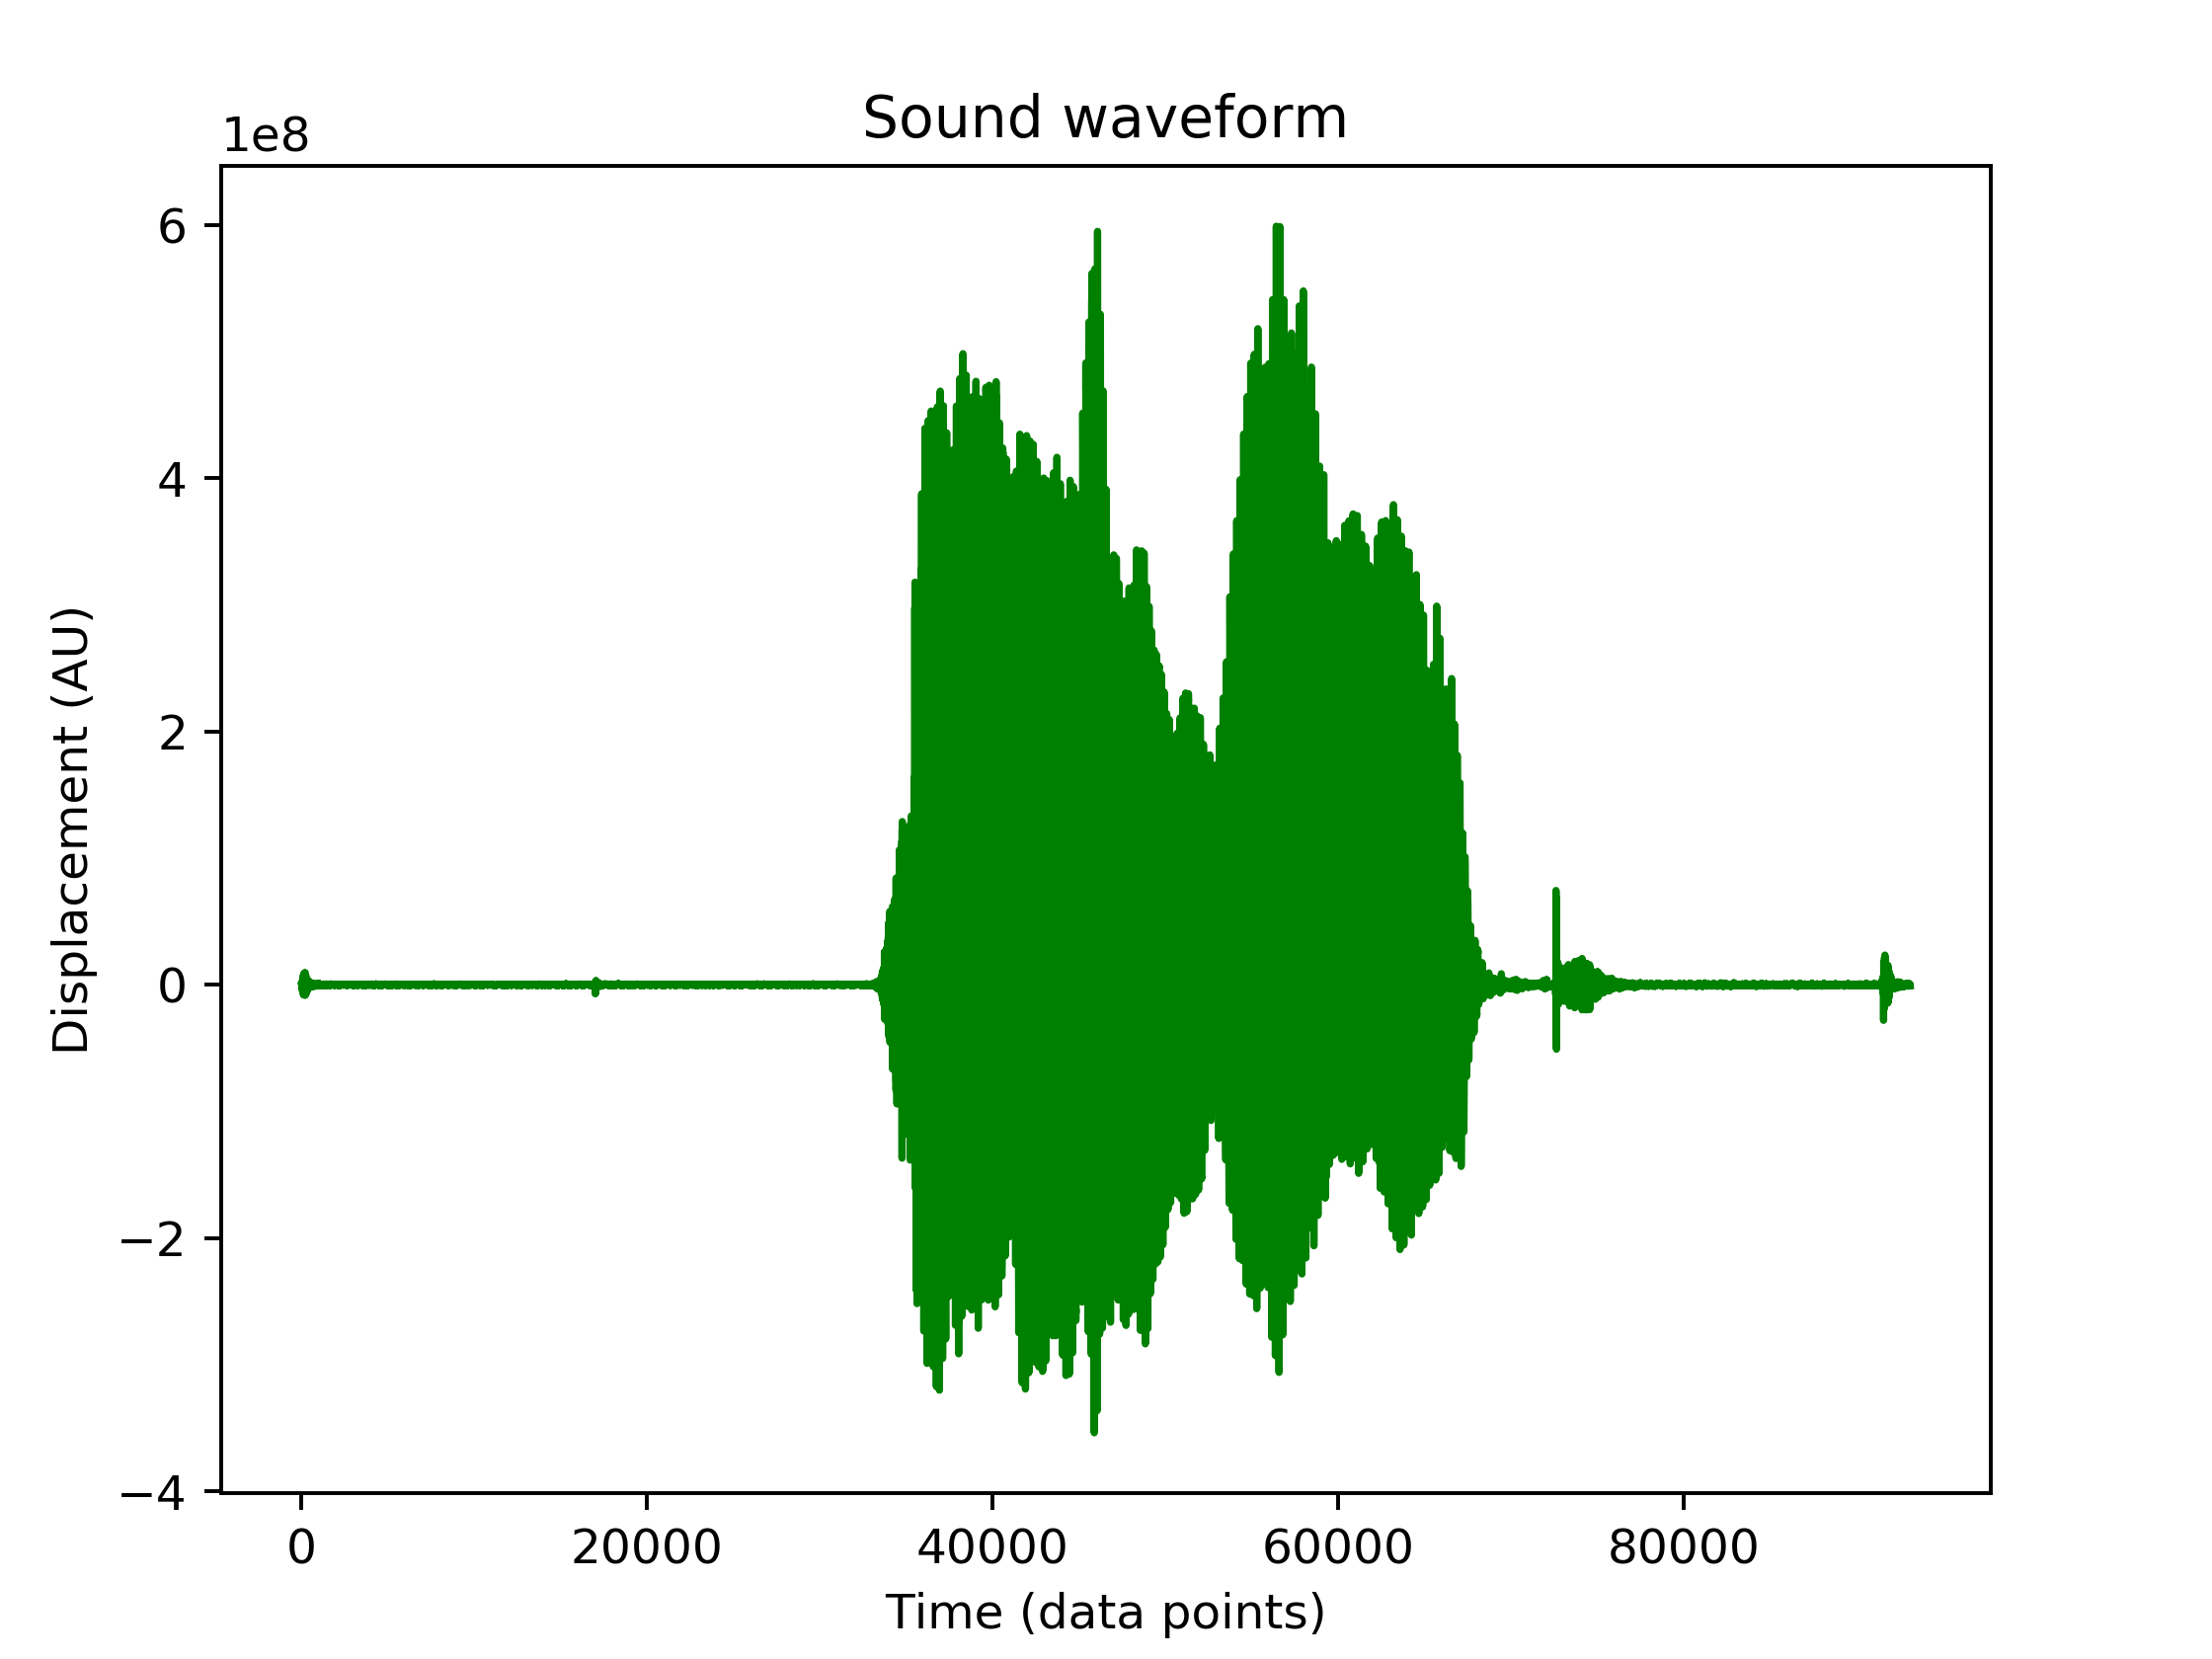

In [370]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, 'green')

axes.set_xlabel('Time (data points)')
axes.set_ylabel('Displacement (AU)')
axes.set_title('Sound waveform');

Writing a WAV file. You will need to specify a path, the sampling rate, and the file you would like to write.

In [371]:
wavwrite("/Users/serenafaruque/Dropbox/helloworld2.wav",44100,x)

Experiment with making your own wav file, reading it into Python, examining the sampling rate and length of the file, and writing it yourself!

## Manipulating sound

Changing volume (the hard way). If the multiply the numbers, they will create a larger signal and make a louder sound.

<IPython.core.display.Javascript object>


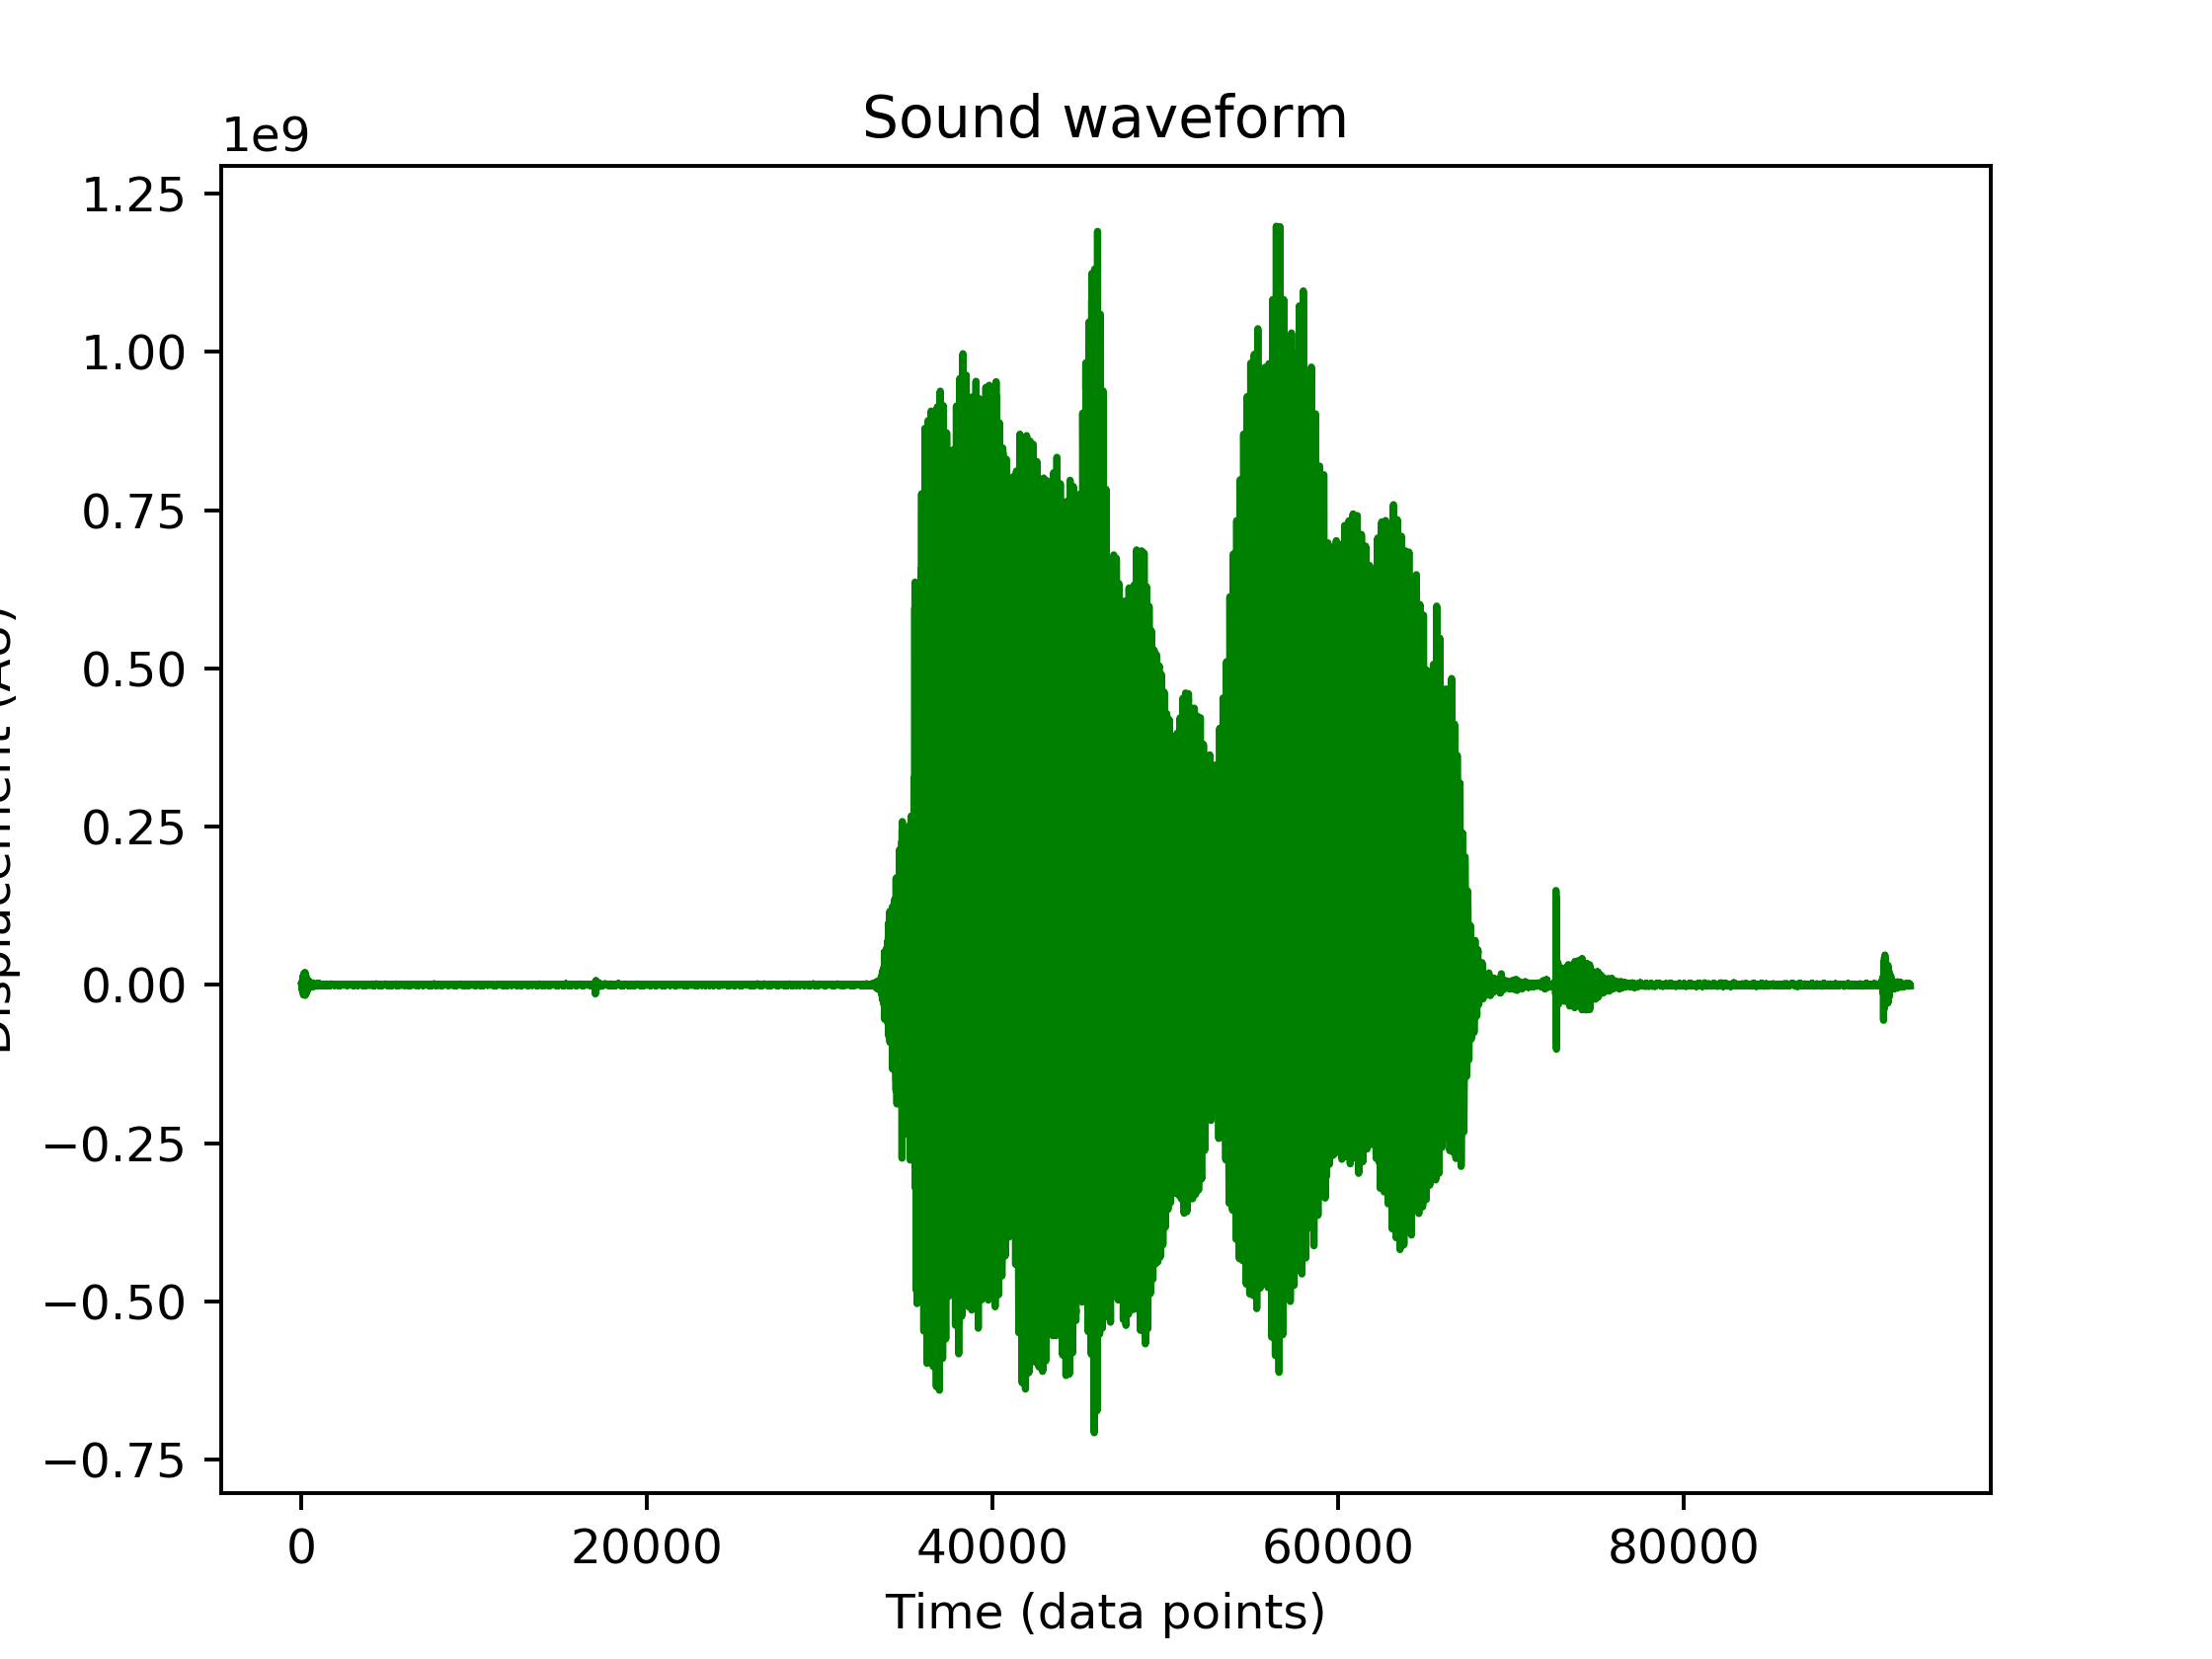

In [372]:
y = x*2

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(y, 'green')

axes.set_xlabel('Time (data points)')
axes.set_ylabel('Displacement (AU)')
axes.set_title('Sound waveform');

Check it out!

In [373]:
wavwrite("/Users/serenafaruque/Dropbox/helloworldLOUD.wav",44100,y)

Change the volume on your own, experiment!

We can also make it faster or slower, easily, by changing the sampling rate.

In [374]:
wavwrite("/Users/serenafaruque/Dropbox/helloworldFAST.wav",88200,x)

Change the speed on your own, experiment!

We can string multiple arrays together (we call this concatentation).

<IPython.core.display.Javascript object>


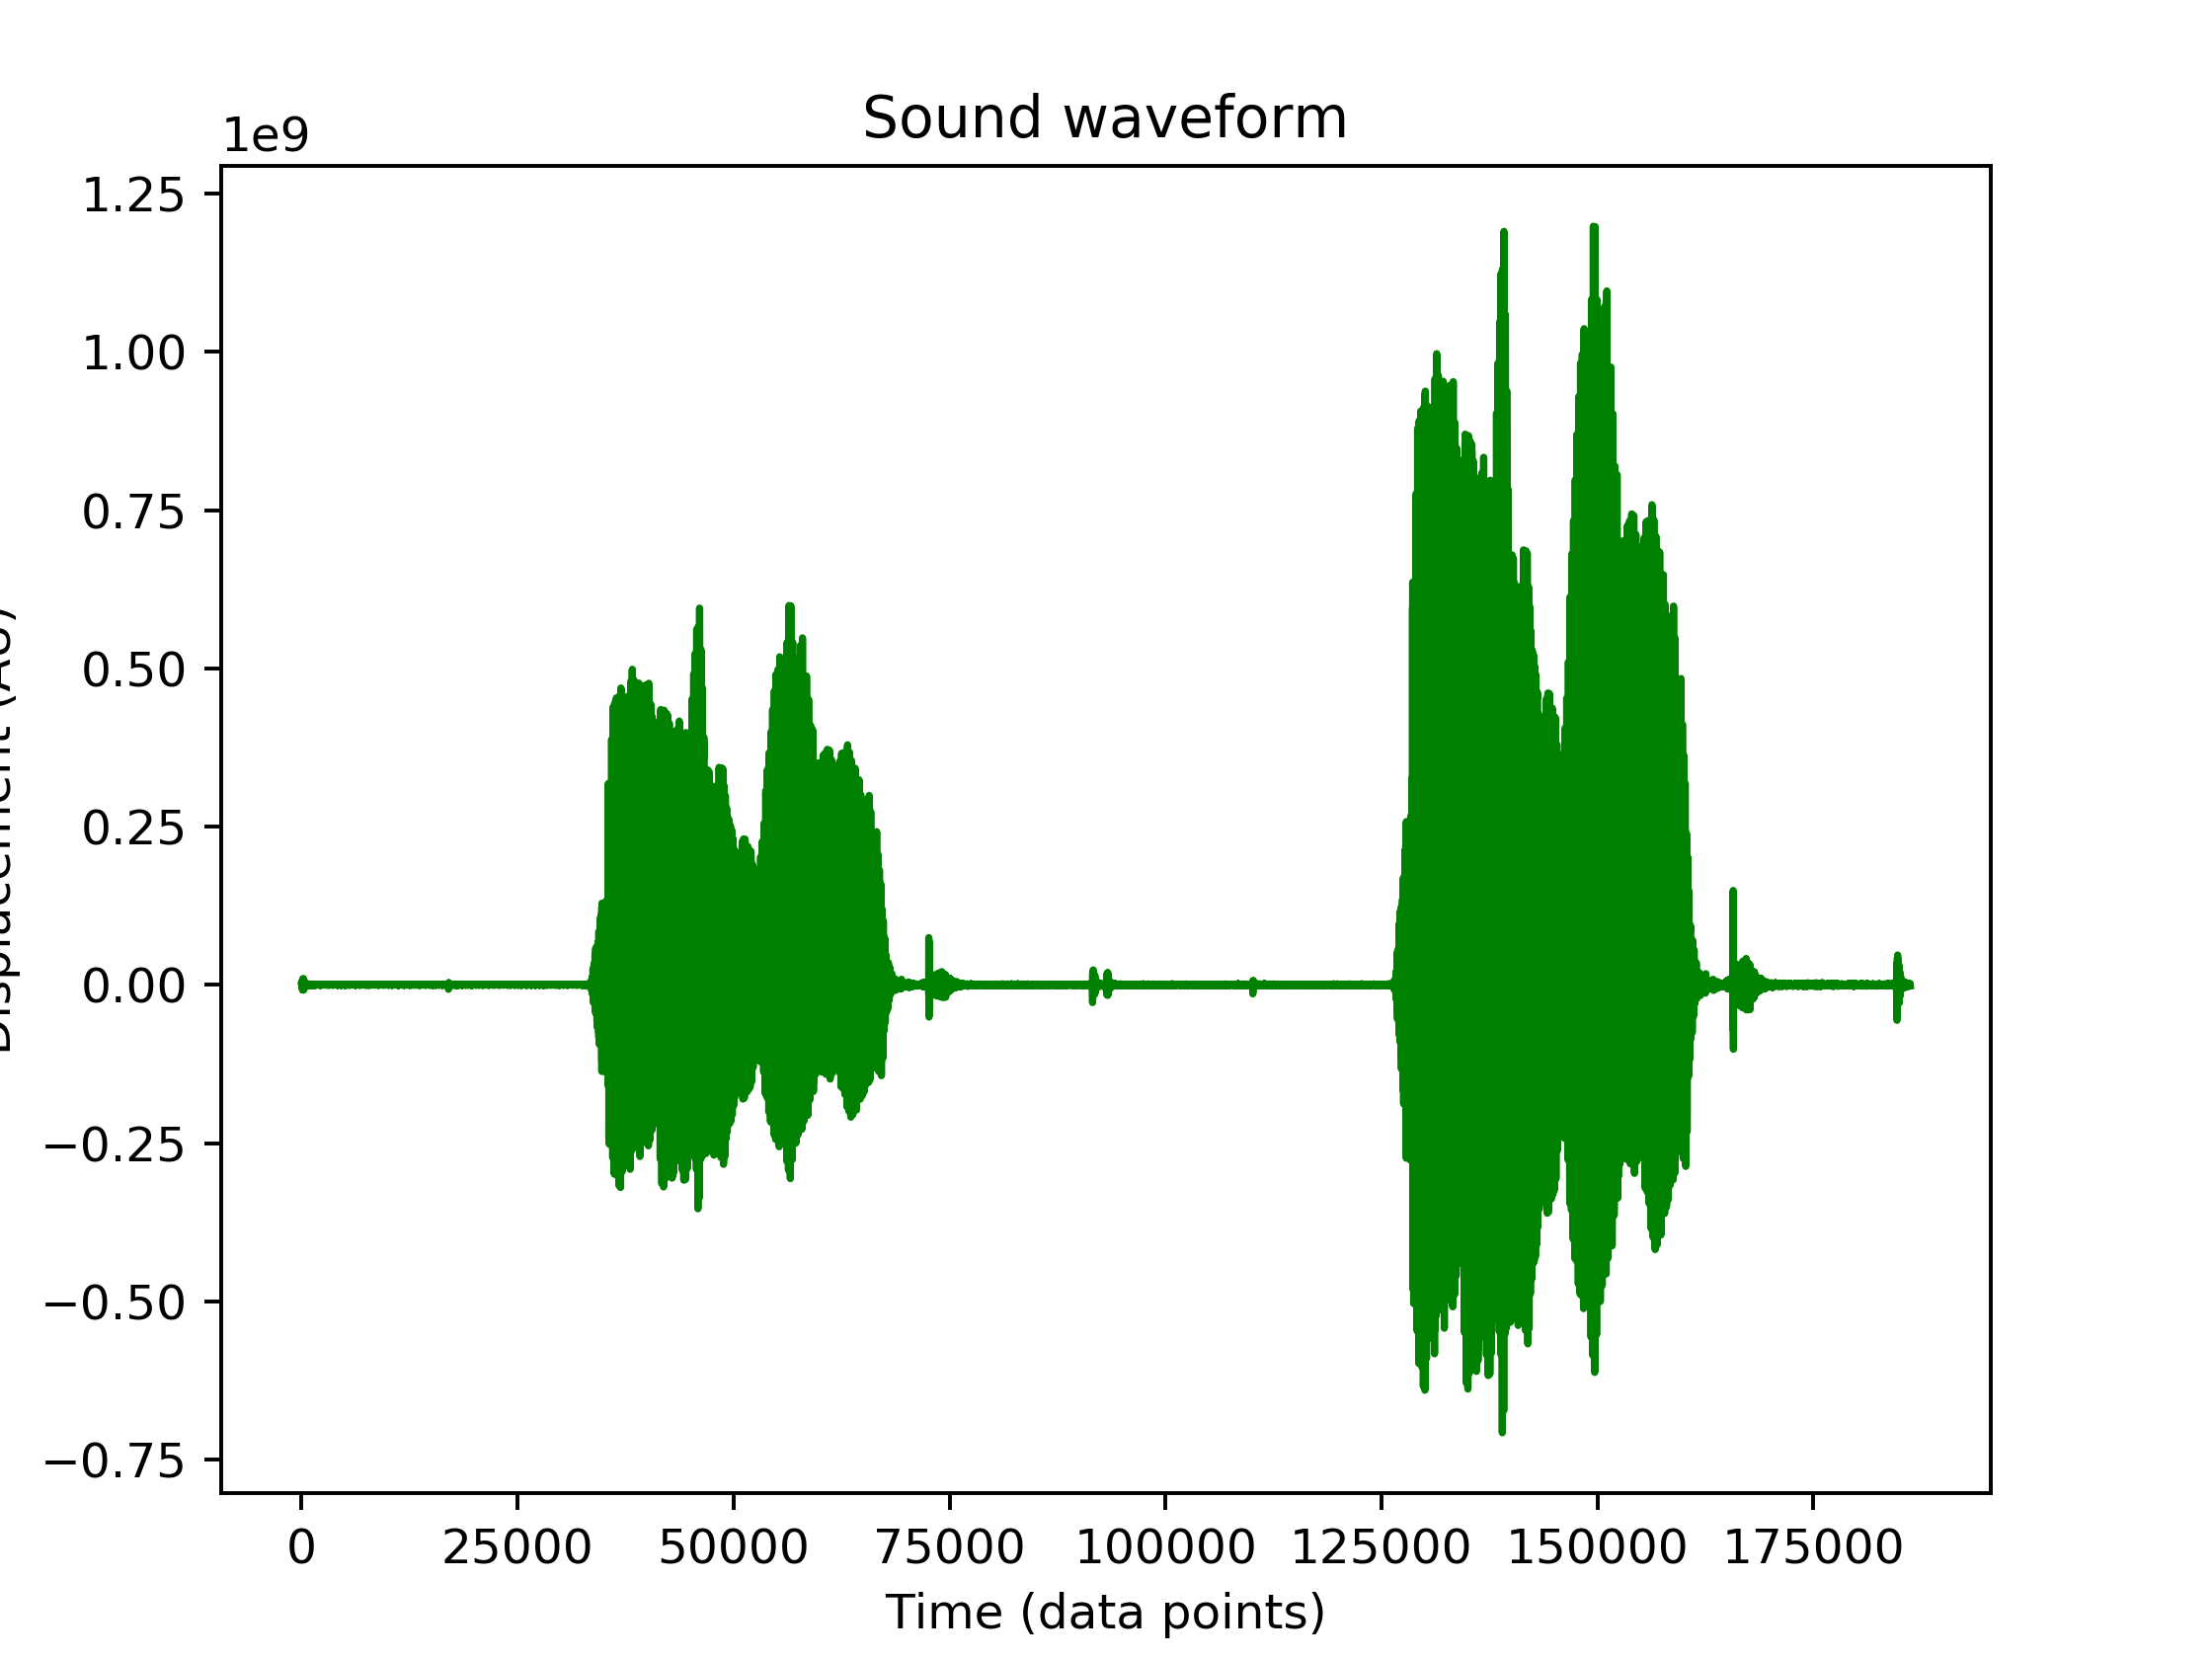

In [375]:
z = numpy.concatenate((x,y),axis=0)

wavwrite("/Users/serenafaruque/Dropbox/helloworldCON.wav",44100,z)

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(z, 'green')

axes.set_xlabel('Time (data points)')
axes.set_ylabel('Displacement (AU)')
axes.set_title('Sound waveform');

We can also add zeros, as well.

<IPython.core.display.Javascript object>


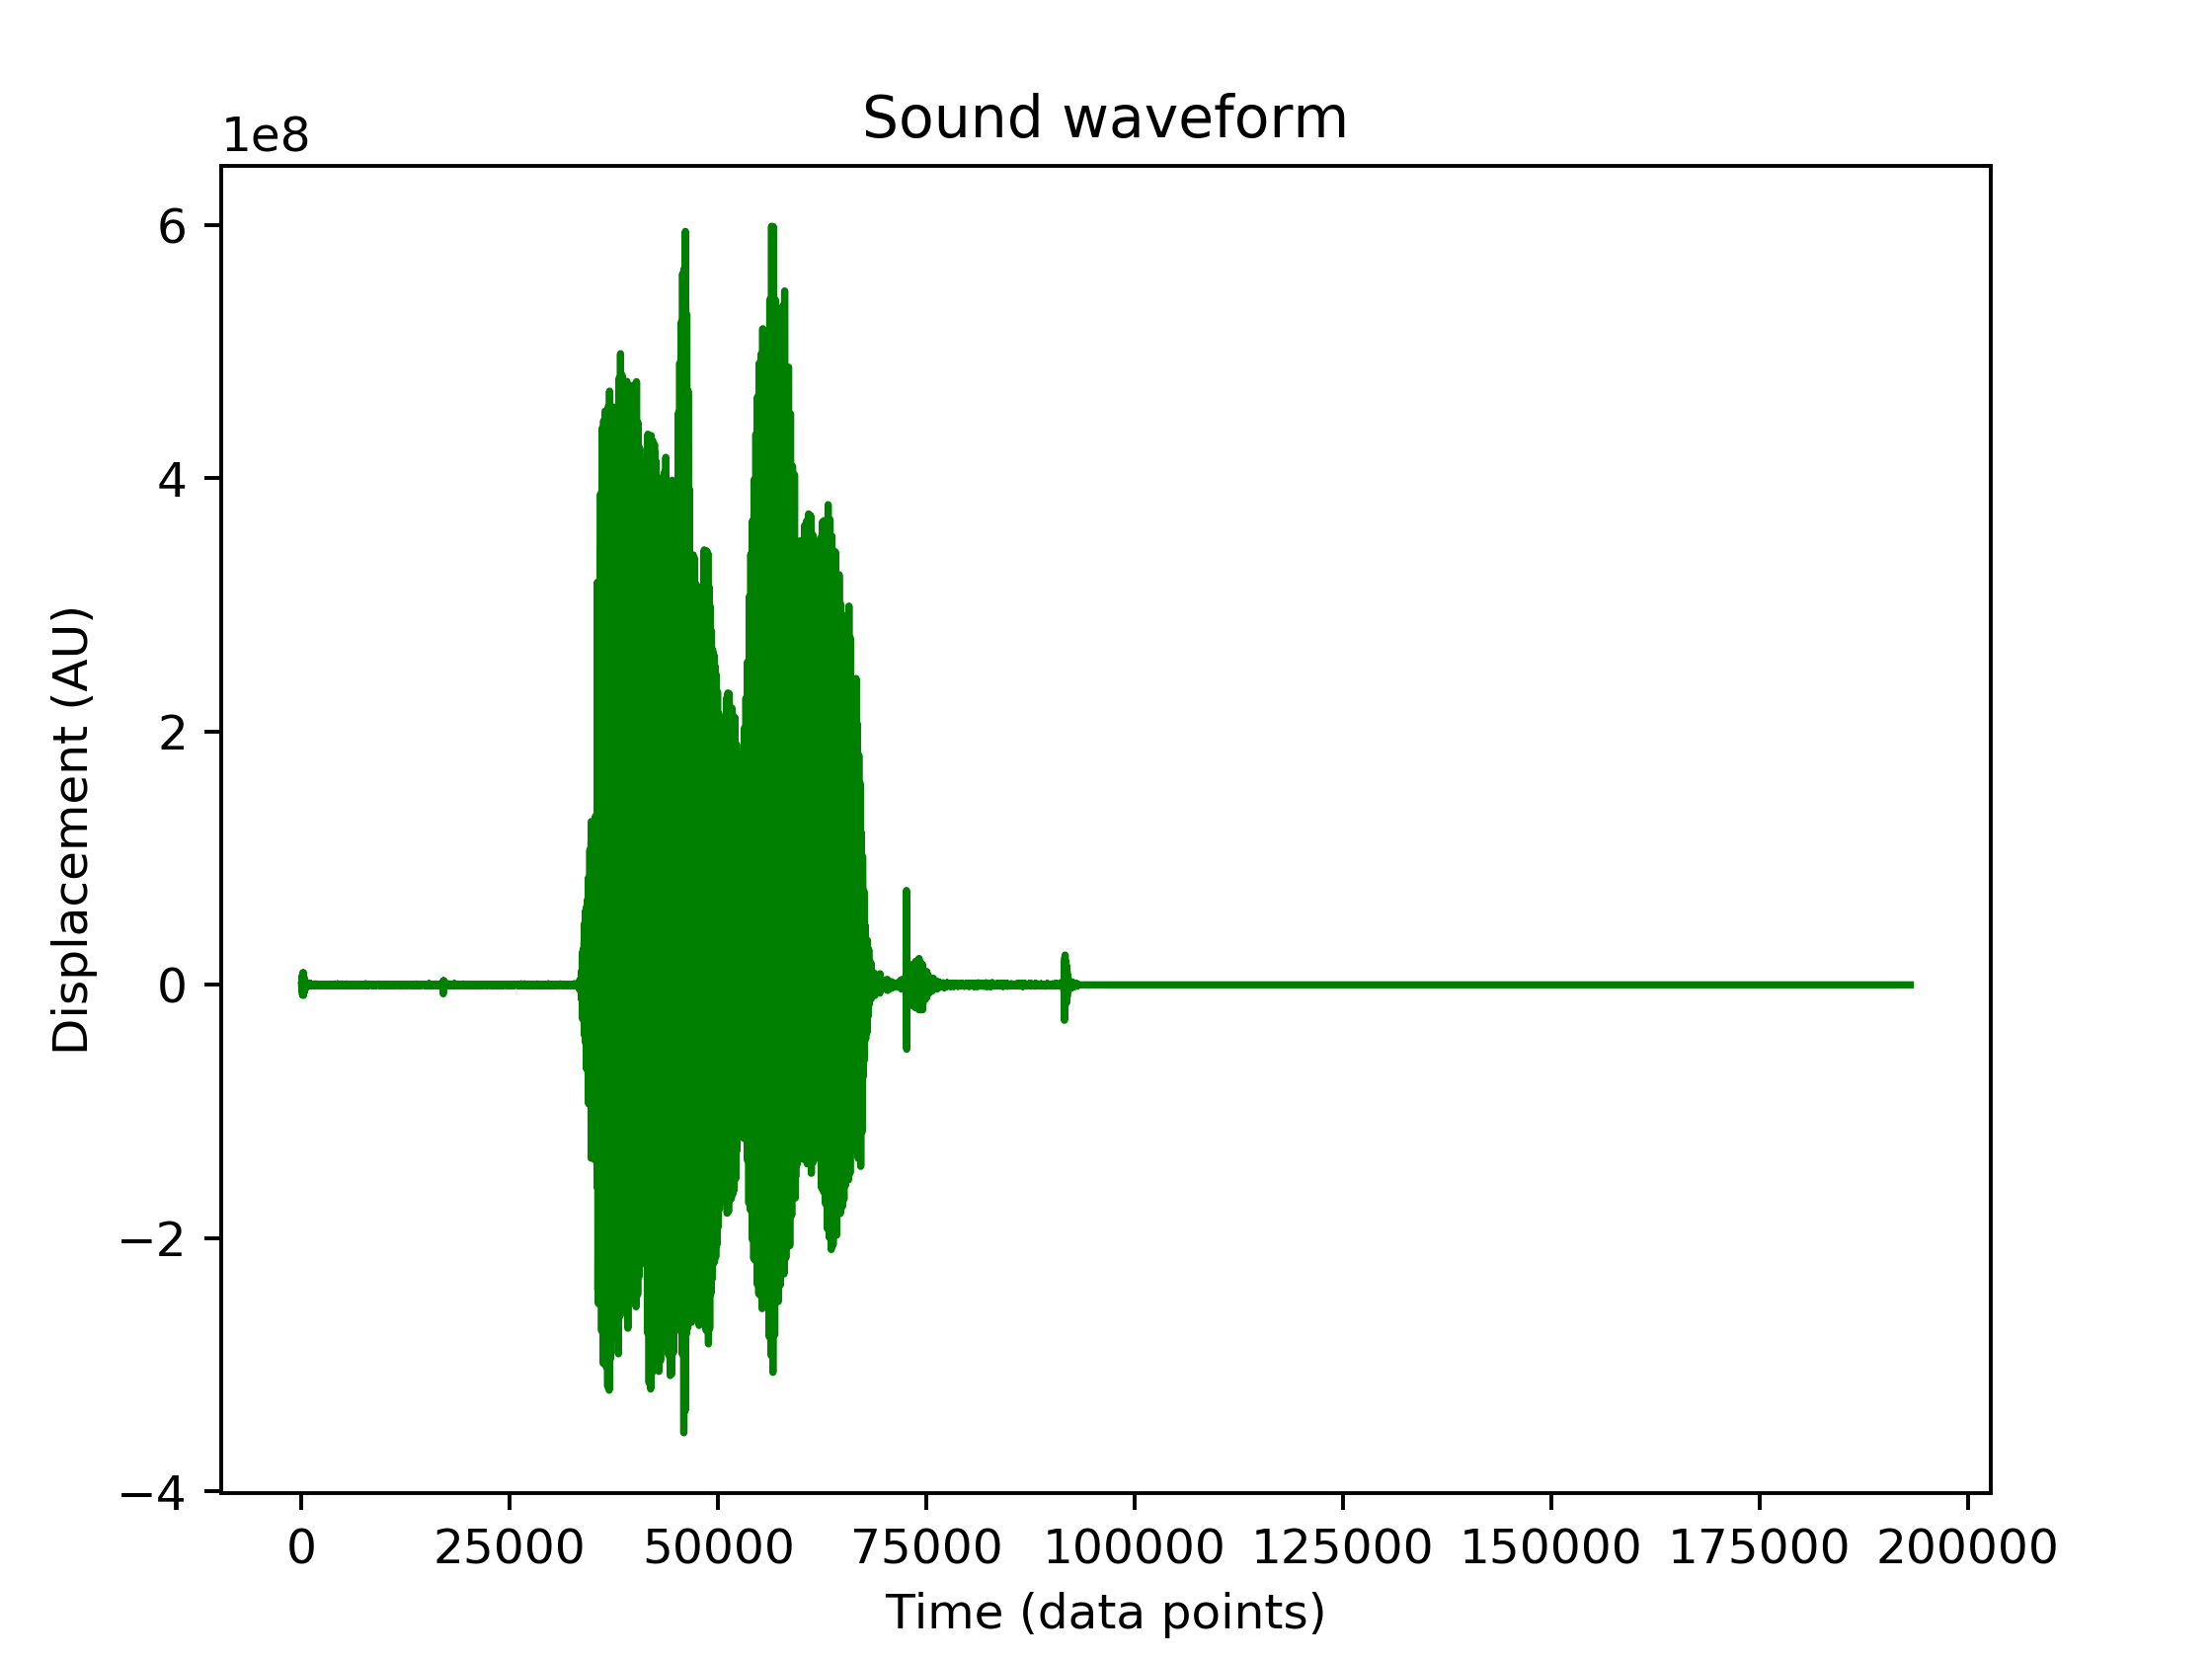

In [376]:
zo = numpy.zeros(100000, dtype=int)
za = numpy.concatenate((x,zo),axis=0)

wavwrite("/Users/serenafaruque/Dropbox/helloworldZERO.wav",44100,za)

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(za, 'green')

axes.set_xlabel('Time (data points)')
axes.set_ylabel('Displacement (AU)')
axes.set_title('Sound waveform');

<IPython.core.display.Javascript object>


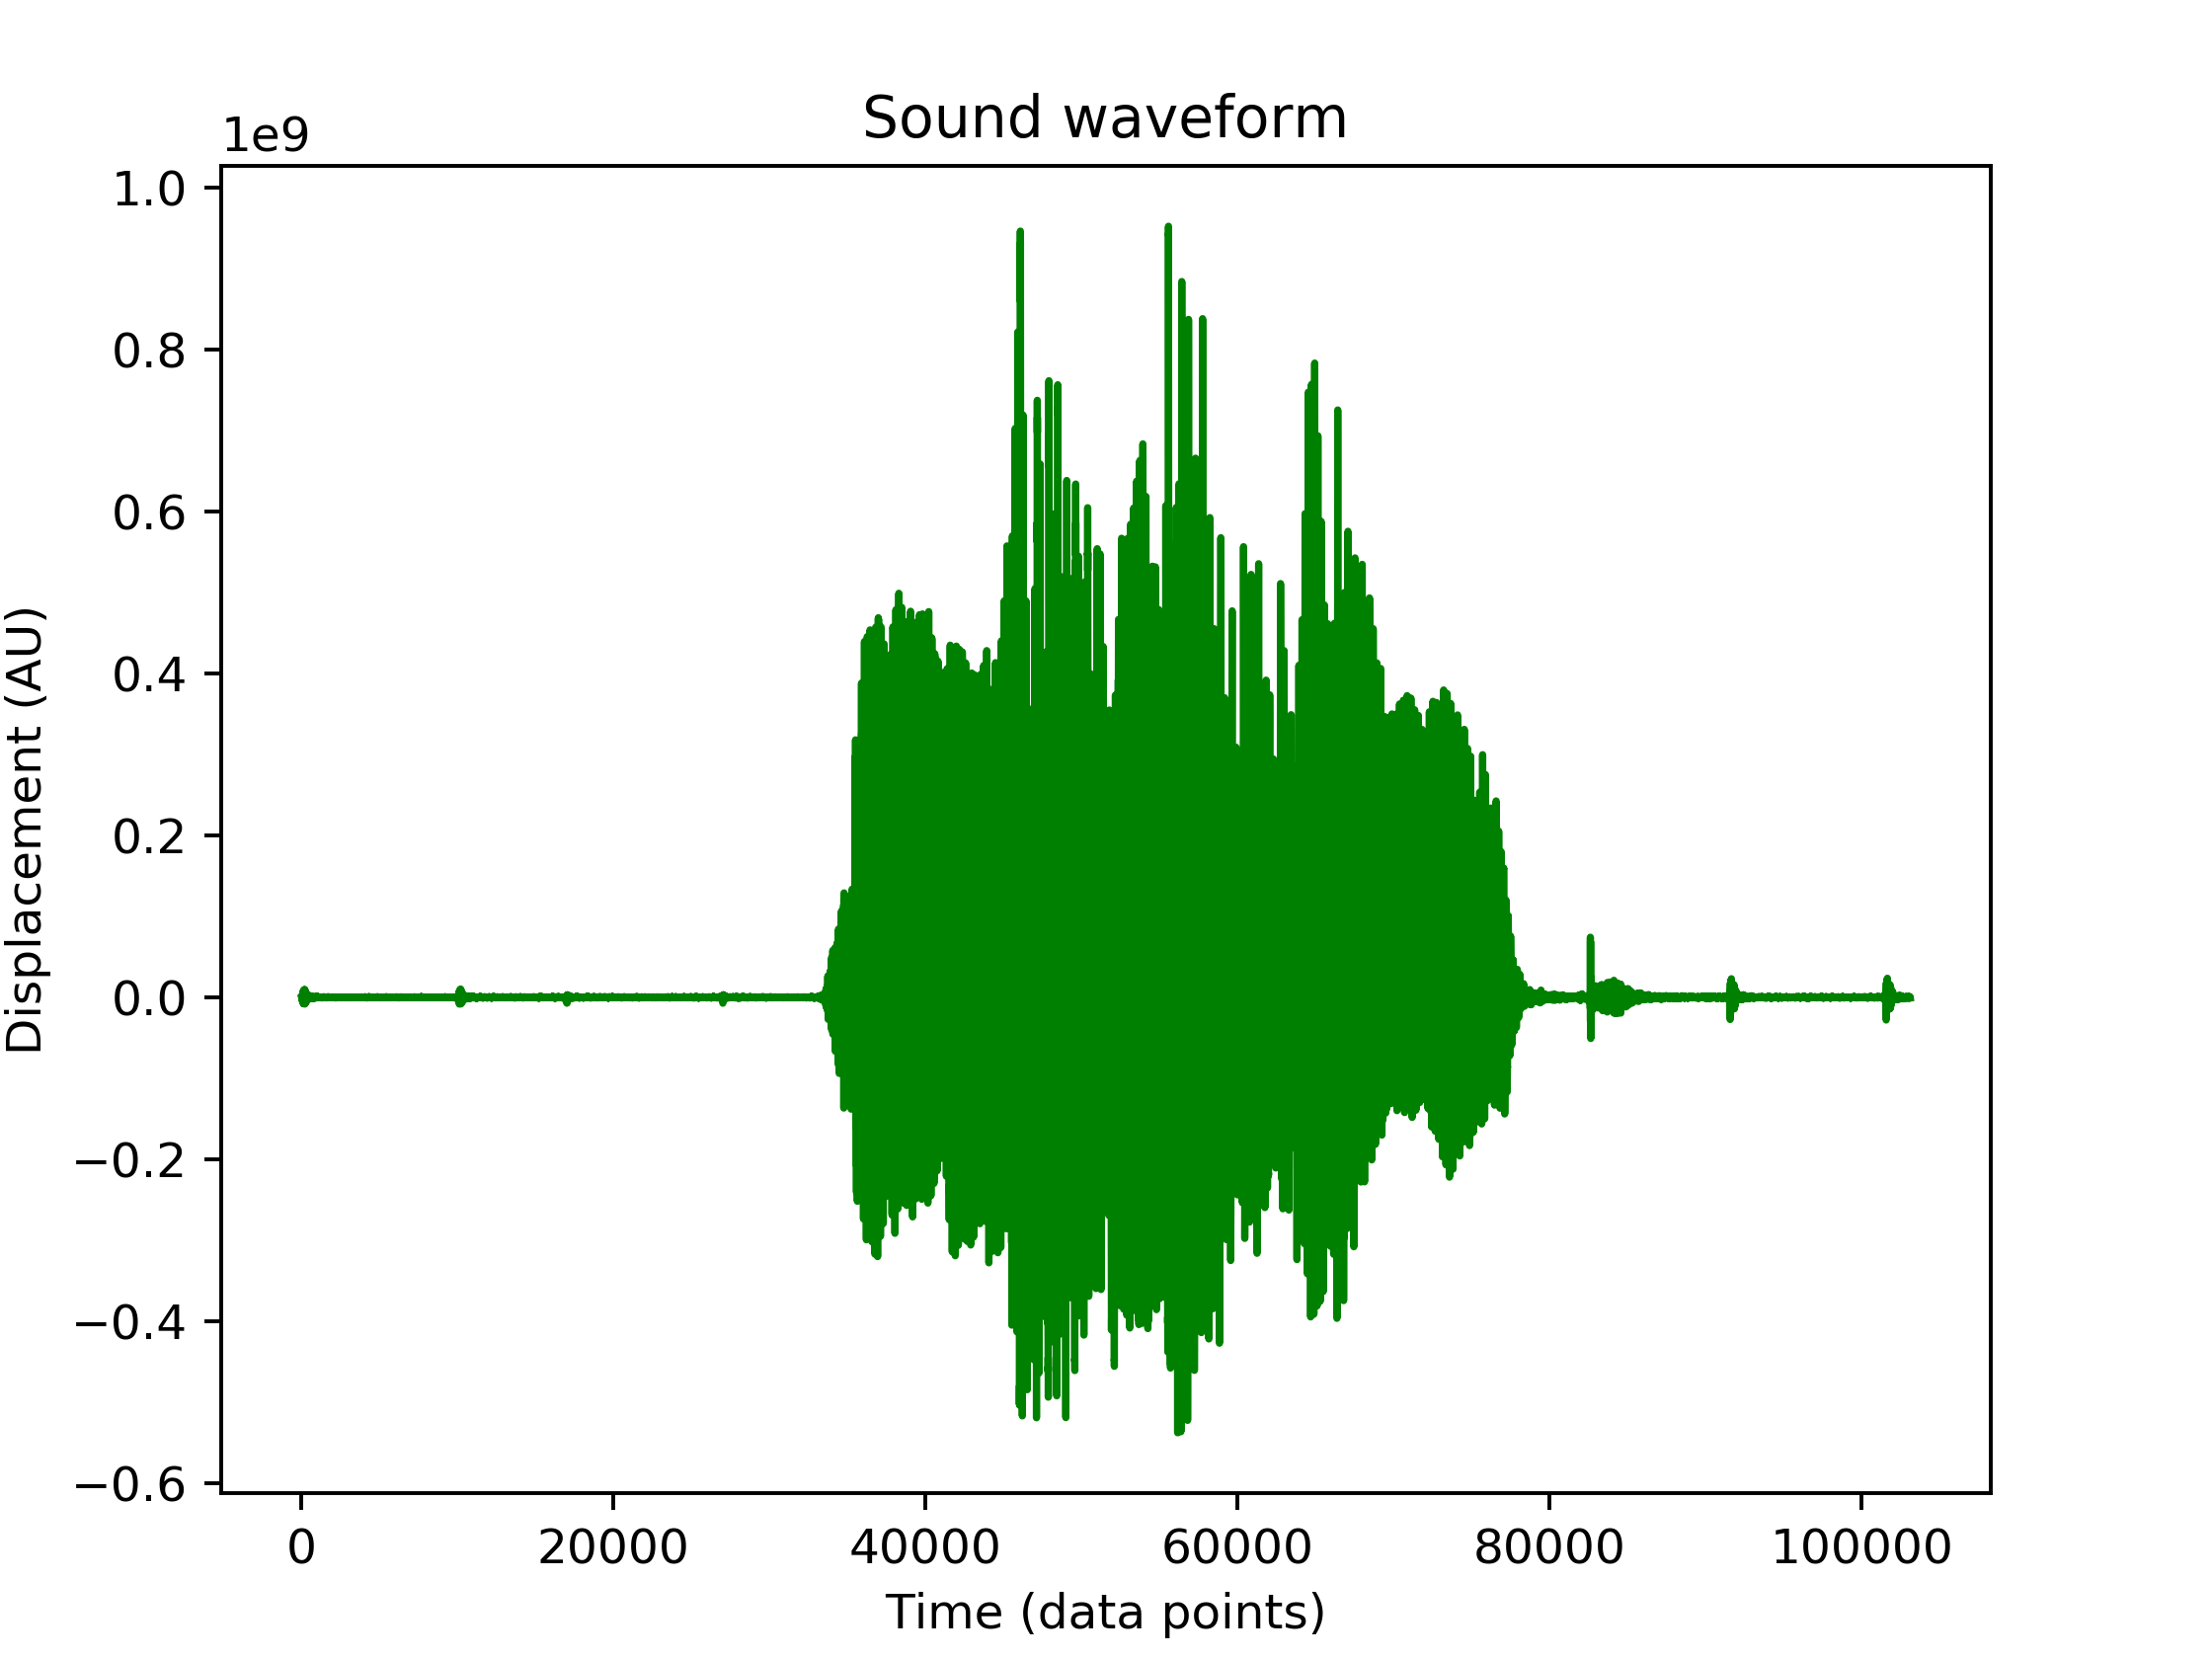

In [377]:
zo = numpy.zeros(10000, dtype=int)
zb = numpy.concatenate((zo,x),axis=0) + numpy.concatenate((x,zo),axis=0)

wavwrite("/Users/serenafaruque/Dropbox/helloworldECHO.wav",44100,zb)

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(zb, 'green')

axes.set_xlabel('Time (data points)')
axes.set_ylabel('Displacement (AU)')
axes.set_title('Sound waveform');

Finally, we can add values from different points in time, to create different effects.

<IPython.core.display.Javascript object>


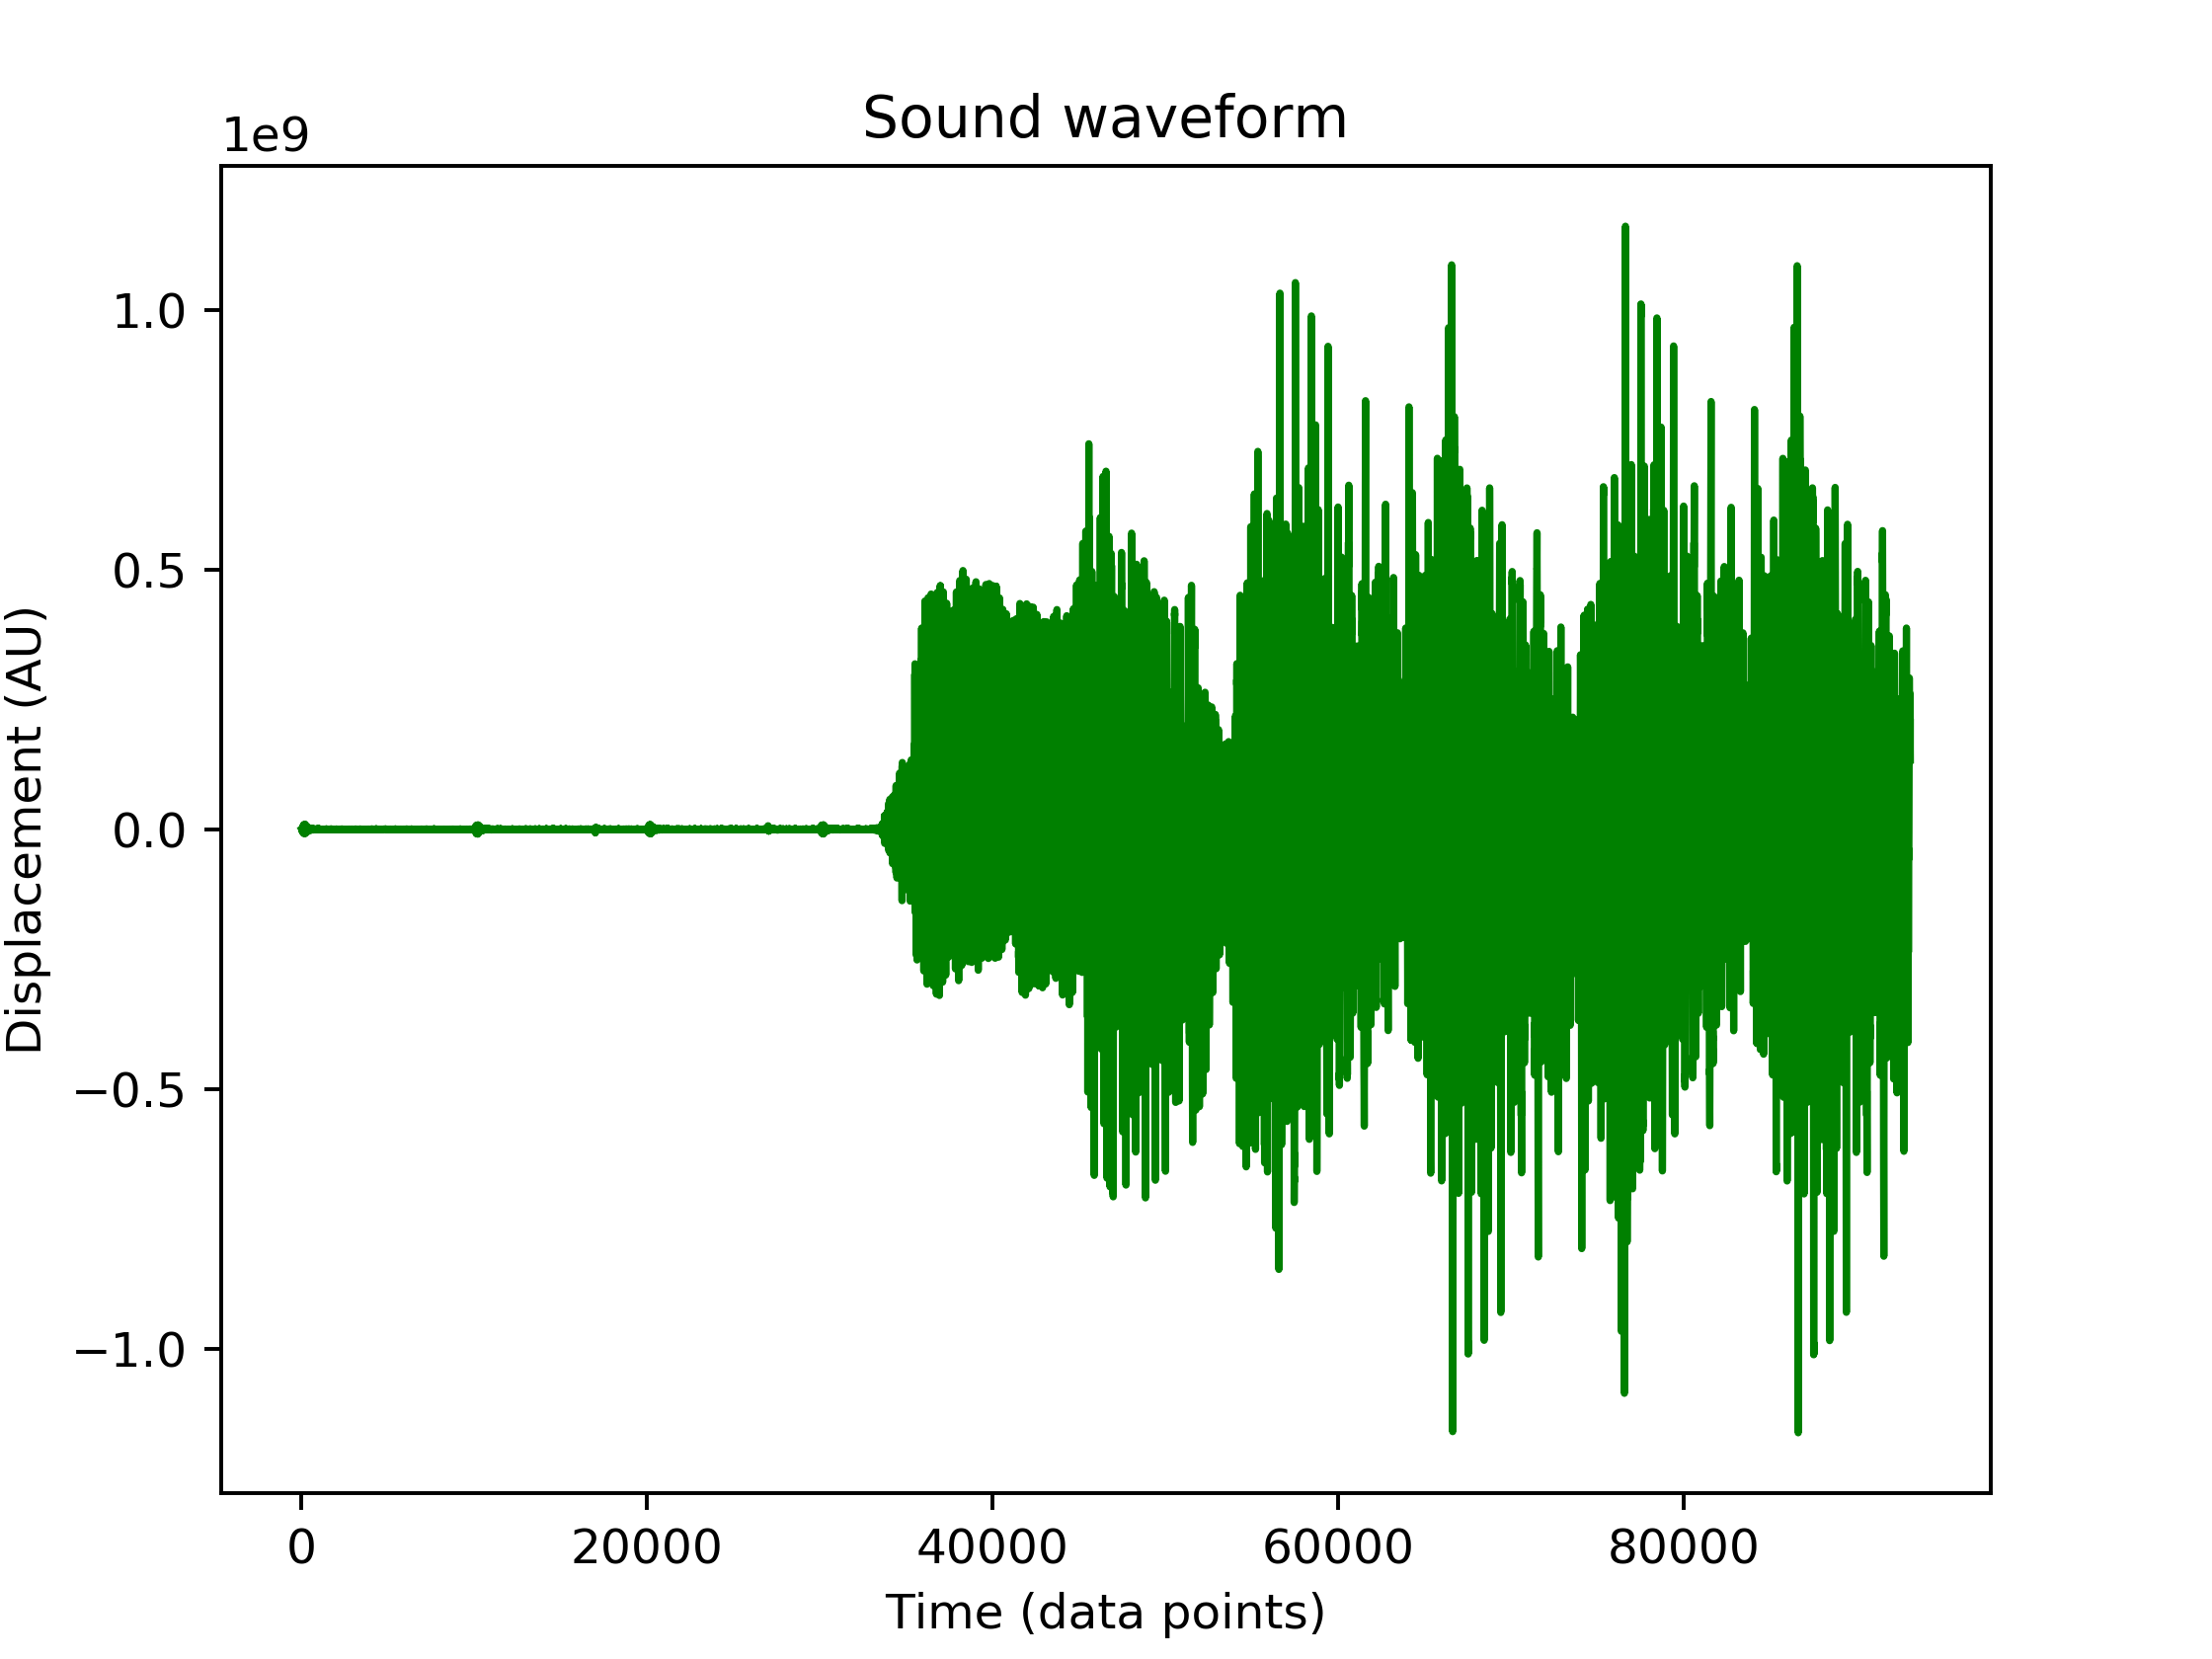

In [378]:
t = x

delay = 10000
coefficient = 1

for i in range(delay,len(t)):
    t[i]=t[i]-t[i-delay]
    
wavwrite("/Users/serenafaruque/Dropbox/helloworldFILTER.wav",44100,t)

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(t, 'green')

axes.set_xlabel('Time (data points)')
axes.set_ylabel('Displacement (AU)')
axes.set_title('Sound waveform');

Do you see patterns in what works for the delays and coefficients?

Use the tools we have discussed to make your very own clip! 